In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 

In [14]:
df = pd.read_csv('../data/covid_toy.csv')

In [15]:
df.isna().mean()*100

age           0.0
gender        0.0
fever        10.0
cough         0.0
city          0.0
has_covid     0.0
dtype: float64

In [16]:
df = df[['fever']]

In [50]:
df['mean_fever'] = df['fever'].fillna(np.mean(df['fever']))
df['median_fever'] = df['fever'].fillna(df['fever'].median())
df['arbitary_99'] = df['fever'].fillna(99)

In [37]:
df.sample(5)

,fever,mean_fever,median_fever
67,99.0,99.000000,99.0
61,98.0,98.000000,98.0
23,98.0,98.000000,98.0
25,NaN,100.844444,101.0
16,103.0,103.000000,103.0


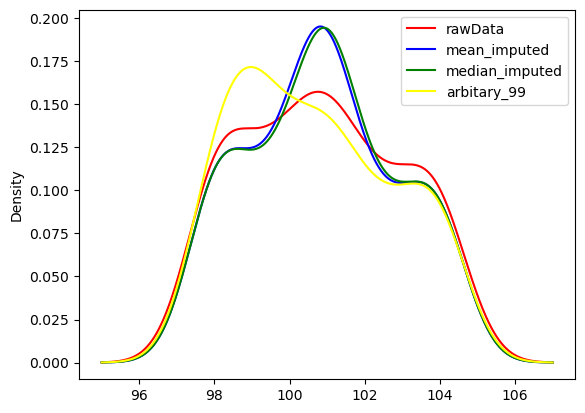

In [51]:
plt.figure()
df['fever'].plot.density(color = 'red', label = 'rawData')
df['mean_fever'].plot.density(color = 'blue', label = 'mean_imputed')
df['median_fever'].plot.density(color = 'green', label = 'median_imputed')
df['arbitary_99'].plot.density(color = 'yellow', label = 'arbitary_99')
plt.legend()

<Axes: >

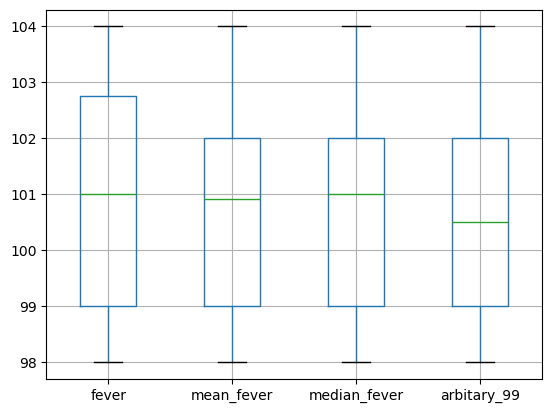

In [53]:
df[['fever', 'mean_fever', 'median_fever', 'arbitary_99']].boxplot()

Imputing the also changes the quatiles

In [54]:
df.cov()

,fever,mean_fever,median_fever,arbitary_99
fever,4.222722,4.222722,4.222722,4.222722
mean_fever,4.222722,3.796184,3.796184,3.796184
median_fever,4.222722,3.796184,3.798384,3.770101
arbitary_99,4.222722,3.796184,3.770101,4.105455


In [46]:
df.var()

fever           4.222722
mean_fever      3.796184
median_fever    3.798384
dtype: float64

In [47]:
df.corr()

,fever,mean_fever,median_fever
fever,1.0,1.00000,1.00000
mean_fever,1.0,1.00000,0.99971
median_fever,1.0,0.99971,1.00000


### USING SKLEARN 

In [55]:
imp1 = SimpleImputer(strategy='mean')
imp2= SimpleImputer(strategy='median')
imp3 =SimpleImputer(strategy='constant', fill_value=99)

In [60]:
df_sk = imp3.fit_transform(df)

In [61]:
pd.DataFrame(df_sk)

,0,1,2,3
0,103.0,103.0,103.0,103.0
1,100.0,100.0,100.0,100.0
2,101.0,101.0,101.0,101.0
3,98.0,98.0,98.0,98.0
4,101.0,101.0,101.0,101.0
...,...,...,...,...
95,104.0,104.0,104.0,104.0
96,101.0,101.0,101.0,101.0
97,101.0,101.0,101.0,101.0
98,98.0,98.0,98.0,98.0


array([[103.        , 103.        , 103.        , 103.        ],
       [100.        , 100.        , 100.        , 100.        ],
       [101.        , 101.        , 101.        , 101.        ],
       [ 98.        ,  98.        ,  98.        ,  98.        ],
       [101.        , 101.        , 101.        , 101.        ],
       [100.84444444, 100.84444444, 101.        ,  99.        ],
       [101.        , 101.        , 101.        , 101.        ],
       [100.84444444, 100.84444444, 101.        ,  99.        ],
       [100.        , 100.        , 100.        , 100.        ],
       [101.        , 101.        , 101.        , 101.        ],
       [100.84444444, 100.84444444, 101.        ,  99.        ],
       [ 98.        ,  98.        ,  98.        ,  98.        ],
       [ 99.        ,  99.        ,  99.        ,  99.        ],
       [102.        , 102.        , 102.        , 102.        ],
       [104.        , 104.        , 104.        , 104.        ],
       [103.        , 103

In [27]:
trf.named_transformers_.mean_imputor.statistics_

array([100.84444444])